# <center> Laptop Price Prediction Case Study <center>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,make_scorer
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingRegressor, StackingRegressor

In [2]:
print(pd.__version__)

1.4.2


## Loading the dataset

In [168]:
data = pd.read_csv('laptop_data.csv')

## Inspecting the dataset

In [169]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [170]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [171]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [172]:
data.shape

(1303, 11)

In [173]:
data.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [174]:
data.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


In [175]:
data.describe(include = 'object')

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,6,40,118,9,39,110,9,179
top,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,727,507,190,619,412,281,1072,121


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [177]:
for col in data.columns:
    print(data[col].value_counts())
    print(20 * "*")

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64
********************
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64
********************
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64
********************
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230

# <center> Exploratory Data Analysis <center>

## Feature Engineering

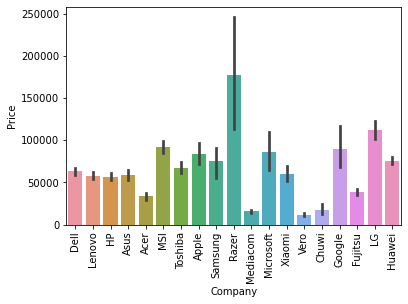

In [178]:
sns.barplot(x='Company', y='Price', data=data, order = data['Company'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

##### As the laptop price depends on the company, I want to keep the company name as it is.

In [179]:
data.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

Text(0, 0.5, 'Count')

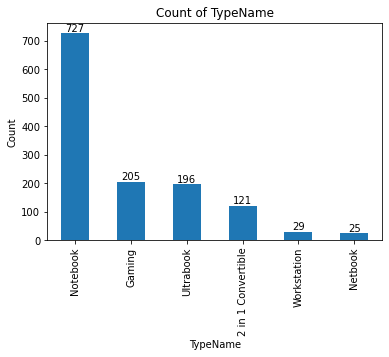

In [180]:
ax = data['TypeName'].value_counts().plot(kind='bar')
# Add labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.title("Count of TypeName")  # Title of the plot
plt.xlabel("TypeName")          # Label for the x-axis
plt.ylabel("Count")             # Label for the y-axis

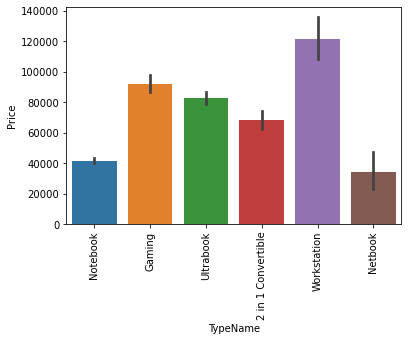

In [181]:
sns.barplot(x='TypeName', y='Price', data=data, order = data['TypeName'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

##### As the laptop price depends on the TypeName, I want to keep the TypeName column as it is.

In [182]:
data['Inches'].value_counts().sort_index()

10.1      4
11.3      1
11.6     33
12.0      6
12.3      5
12.5     39
13.0      2
13.3    164
13.5      6
13.9      6
14.0    197
14.1      1
15.0      4
15.4      4
15.6    665
17.0      1
17.3    164
18.4      1
Name: Inches, dtype: int64

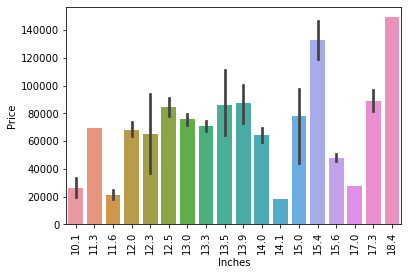

In [183]:
sns.barplot(x='Inches', y='Price', data=data, order = data['Inches'].value_counts().sort_index().index)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Price'>

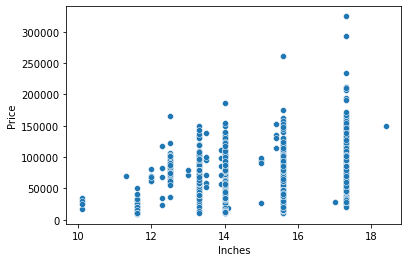

In [184]:
sns.scatterplot(x=data['Inches'],y=data['Price'])

##### As the laptop price depends on the Inches, I want to keep the Inches column as it is.

In [185]:
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [186]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<AxesSubplot:>

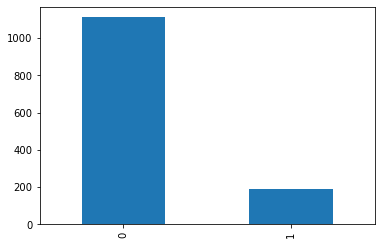

In [187]:
data['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

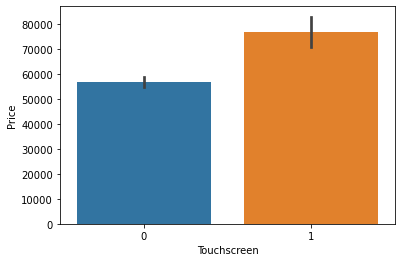

In [188]:
sns.barplot(x='Touchscreen', y='Price', data=data)

In [189]:
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<AxesSubplot:>

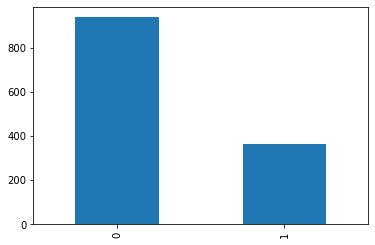

In [190]:
data['Ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ips', ylabel='Price'>

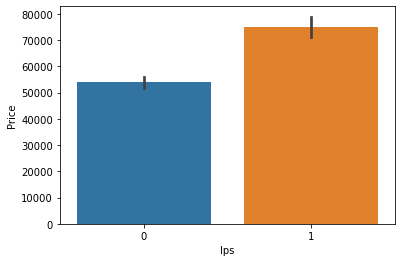

In [191]:
sns.barplot(x='Ips', y='Price', data=data)

In [192]:
new = data['ScreenResolution'].str.split('x',n=1,expand=True)

In [193]:
data['X_res'] = new[0]
data['Y_res'] = new[1]

In [194]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [195]:
data['X_res'] = data['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [196]:
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float64(2), int32(2), int64(2), object(9)
memory usage: 142.6+ KB


##### Let's create an another important feature called 'ppi', that depends on the X_res, Y_res and Inches of the laptop

In [198]:
data['ppi'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')

In [199]:
data.drop(columns='ScreenResolution', inplace = True)

In [200]:
data.corr()['Price']

Inches         0.068197
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

##### We can eliminate X_res, Y_res, and Inches features and simply rely on ppi feature for model building

In [201]:
data.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [202]:
data.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'Touchscreen', 'Ips', 'ppi'],
      dtype='object')

In [203]:
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [204]:
data['Cpu Name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [205]:
data['Cpu Name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [206]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [207]:
data['Cpu brand'] = data['Cpu Name'].apply(fetch_processor)

<AxesSubplot:>

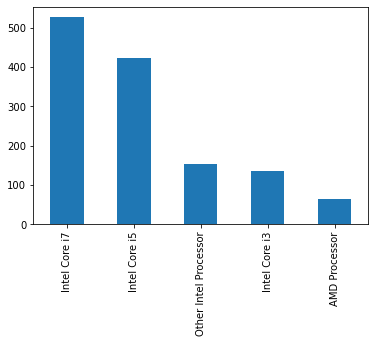

In [208]:
data['Cpu brand'].value_counts().plot(kind='bar')

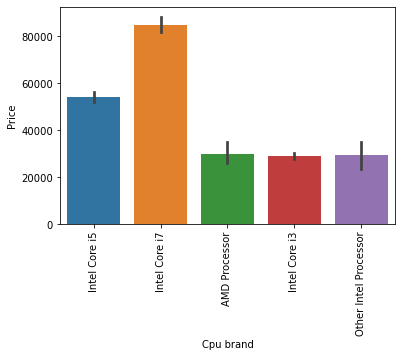

In [209]:
sns.barplot(x='Cpu brand', y='Price', data=data)
plt.xticks(rotation=90)
plt.show()

In [210]:
data.drop(columns=['Cpu','Cpu Name'], inplace=True)

In [211]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5


In [212]:
data['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [213]:
data['Ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [214]:
data['Ram'] = data['Ram'].str.replace("GB",'')

In [215]:
data['Ram'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

In [216]:
data['Ram'] = data['Ram'].astype('int')

In [217]:
data['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [218]:
data['Weight'].value_counts()

2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
3.25kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: Weight, Length: 179, dtype: int64

In [219]:
data['Weight'] = data['Weight'].str.replace("kg",'')

In [220]:
data['Weight'].unique()

array(['1.37', '1.34', '1.86', '1.83', '2.1', '2.04', '1.3', '1.6', '2.2',
       '0.92', '1.22', '0.98', '2.5', '1.62', '1.91', '2.3', '1.35',
       '1.88', '1.89', '1.65', '2.71', '1.2', '1.44', '2.8', '2', '2.65',
       '2.77', '3.2', '0.69', '1.49', '2.4', '2.13', '2.43', '1.7', '1.4',
       '1.8', '1.9', '3', '1.252', '2.7', '2.02', '1.63', '1.96', '1.21',
       '2.45', '1.25', '1.5', '2.62', '1.38', '1.58', '1.85', '1.23',
       '1.26', '2.16', '2.36', '2.05', '1.32', '1.75', '0.97', '2.9',
       '2.56', '1.48', '1.74', '1.1', '1.56', '2.03', '1.05', '4.4',
       '1.90', '1.29', '2.0', '1.95', '2.06', '1.12', '1.42', '3.49',
       '3.35', '2.23', '4.42', '2.69', '2.37', '4.7', '3.6', '2.08',
       '4.3', '1.68', '1.41', '4.14', '2.18', '2.24', '2.67', '2.14',
       '1.36', '2.25', '2.15', '2.19', '2.54', '3.42', '1.28', '2.33',
       '1.45', '2.79', '1.84', '2.6', '2.26', '3.25', '1.59', '1.13',
       '1.78', '1.10', '1.15', '1.27', '1.43', '2.31', '1.16', '1.64',
   

In [221]:
data['Weight'] = data['Weight'].astype('float64')

In [222]:
data['Weight'].unique()

array([1.37 , 1.34 , 1.86 , 1.83 , 2.1  , 2.04 , 1.3  , 1.6  , 2.2  ,
       0.92 , 1.22 , 0.98 , 2.5  , 1.62 , 1.91 , 2.3  , 1.35 , 1.88 ,
       1.89 , 1.65 , 2.71 , 1.2  , 1.44 , 2.8  , 2.   , 2.65 , 2.77 ,
       3.2  , 0.69 , 1.49 , 2.4  , 2.13 , 2.43 , 1.7  , 1.4  , 1.8  ,
       1.9  , 3.   , 1.252, 2.7  , 2.02 , 1.63 , 1.96 , 1.21 , 2.45 ,
       1.25 , 1.5  , 2.62 , 1.38 , 1.58 , 1.85 , 1.23 , 1.26 , 2.16 ,
       2.36 , 2.05 , 1.32 , 1.75 , 0.97 , 2.9  , 2.56 , 1.48 , 1.74 ,
       1.1  , 1.56 , 2.03 , 1.05 , 4.4  , 1.29 , 1.95 , 2.06 , 1.12 ,
       1.42 , 3.49 , 3.35 , 2.23 , 4.42 , 2.69 , 2.37 , 4.7  , 3.6  ,
       2.08 , 4.3  , 1.68 , 1.41 , 4.14 , 2.18 , 2.24 , 2.67 , 2.14 ,
       1.36 , 2.25 , 2.15 , 2.19 , 2.54 , 3.42 , 1.28 , 2.33 , 1.45 ,
       2.79 , 1.84 , 2.6  , 2.26 , 3.25 , 1.59 , 1.13 , 1.78 , 1.15 ,
       1.27 , 1.43 , 2.31 , 1.16 , 1.64 , 2.17 , 1.47 , 3.78 , 1.79 ,
       0.91 , 1.99 , 4.33 , 1.93 , 1.87 , 2.63 , 3.4  , 3.14 , 1.94 ,
       1.24 , 4.6  ,

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float64
 7   Price        1303 non-null   float64
 8   Touchscreen  1303 non-null   int64  
 9   Ips          1303 non-null   int64  
 10  ppi          1303 non-null   float64
 11  Cpu brand    1303 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 117.2+ KB


In [224]:
data.corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
ppi            0.473487
Name: Price, dtype: float64

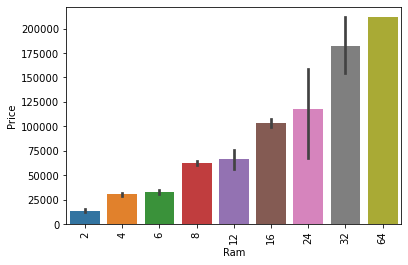

In [225]:
sns.barplot(x='Ram', y='Price', data=data)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Ram', ylabel='Price'>

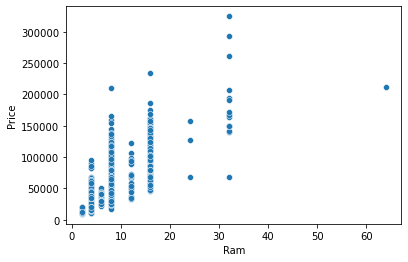

In [226]:
sns.scatterplot(x='Ram', y='Price', data=data)

<AxesSubplot:xlabel='Weight', ylabel='Price'>

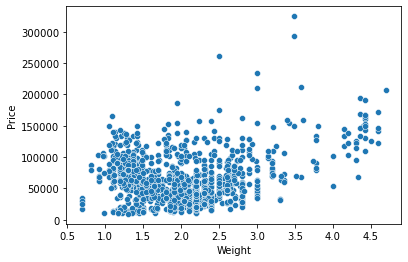

In [227]:
sns.scatterplot(x='Weight', y='Price', data=data)

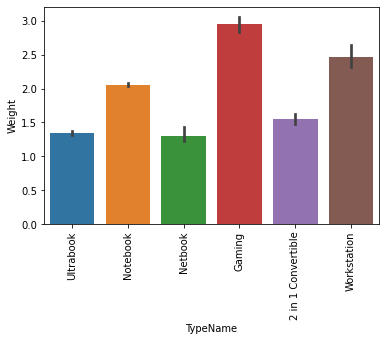

In [228]:
sns.barplot(x='TypeName', y='Weight', data=data)
plt.xticks(rotation=90)
plt.show()

In [229]:
data[data['Ram']==64]

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
1066,Asus,Gaming,64,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58,211788.0,0,1,127.335675,Intel Core i7


In [230]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

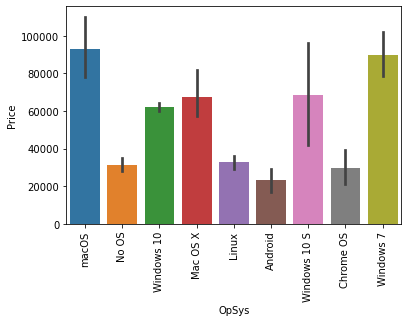

In [231]:
sns.barplot(x=data['OpSys'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [232]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [233]:
data['os'] = data['OpSys'].apply(cat_os)

In [234]:
data['os'].value_counts()

Windows               1125
Others/No OS/Linux     157
Mac                     21
Name: os, dtype: int64

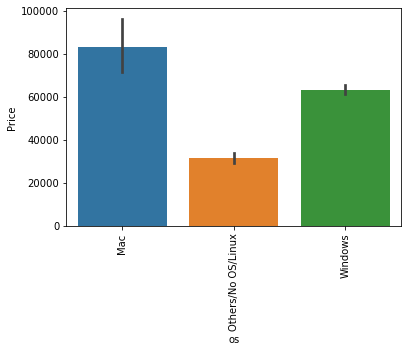

In [235]:
sns.barplot(x=data['os'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [236]:
data.drop(columns=['OpSys'], inplace = True)

In [237]:
data.columns

Index(['Company', 'TypeName', 'Ram', 'Memory', 'Gpu', 'Weight', 'Price',
       'Touchscreen', 'Ips', 'ppi', 'Cpu brand', 'os'],
      dtype='object')

In [238]:
data['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [239]:
data['Gpu brand'] = data['Gpu'].apply(lambda x: x.split()[0])

In [240]:
data['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [241]:
data[data['Gpu brand']=='ARM']

,Company,TypeName,Ram,Memory,Gpu,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,os,Gpu brand
1191,Samsung,2 in 1 Convertible,4,32GB Flash Storage,ARM Mali T860 MP4,1.15,35111.52,1,1,234.5074,AMD Processor,Others/No OS/Linux,ARM


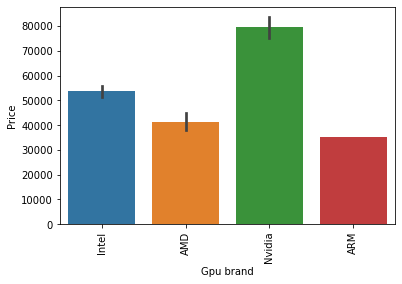

In [242]:
sns.barplot(x=data['Gpu brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [243]:
data = data[data['Gpu brand']!='ARM']

In [244]:
data.drop(columns='Gpu', inplace = True)

In [245]:
data.head()

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,os,Gpu brand
0,Apple,Ultrabook,8,128GB SSD,1.37,71378.6832,0,1,226.983005,Intel Core i5,Mac,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Mac,Intel
2,HP,Notebook,8,256GB SSD,1.86,30636.0000,0,0,141.211998,Intel Core i5,Others/No OS/Linux,Intel
3,Apple,Ultrabook,16,512GB SSD,1.83,135195.3360,0,1,220.534624,Intel Core i7,Mac,AMD
4,Apple,Ultrabook,8,256GB SSD,1.37,96095.8080,0,1,226.983005,Intel Core i5,Mac,Intel


In [246]:
data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

##### Different types of memories is combination of either of  these : 'SSD', 'HDD', 'Flash Storage', 'Hybrid'

In [247]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')
new = data["Memory"].str.split("+", n = 1, expand = True)

In [248]:
data["first"]= new[0]
data["first"]=data["first"].str.strip()

data["second"]= new[1]

In [249]:
data['first'].unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage',
       '64 Flash Storage', '32 SSD', '2000 HDD', '64 SSD', '1000 Hybrid',
       '1000 SSD', '16 SSD', '16 Flash Storage', '180 SSD', '32 HDD',
       '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid'],
      dtype=object)

In [250]:
data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [251]:
data.head()

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,os,Gpu brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,1.37,71378.6832,0,1,226.983005,Intel Core i5,Mac,Intel,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Mac,Intel,128 Flash Storage,None,0,0,0,1
2,HP,Notebook,8,256 SSD,1.86,30636.0000,0,0,141.211998,Intel Core i5,Others/No OS/Linux,Intel,256 SSD,None,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,1.83,135195.3360,0,1,220.534624,Intel Core i7,Mac,AMD,512 SSD,None,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,1.37,96095.8080,0,1,226.983005,Intel Core i5,Mac,Intel,256 SSD,None,0,1,0,0


In [252]:
data['first'] = data['first'].str.replace(r'\D', '')

data["second"].fillna("0", inplace = True)

data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['second'] = data['second'].str.replace(r'\D', '')

data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)

data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])

In [253]:
data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [254]:
data.head()

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,os,Gpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,1.37,71378.6832,0,1,226.983005,Intel Core i5,Mac,Intel,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Mac,Intel,0,0,0,128
2,HP,Notebook,8,256 SSD,1.86,30636.0000,0,0,141.211998,Intel Core i5,Others/No OS/Linux,Intel,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,1.83,135195.3360,0,1,220.534624,Intel Core i7,Mac,AMD,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,1.37,96095.8080,0,1,226.983005,Intel Core i5,Mac,Intel,0,256,0,0


In [255]:
data.drop(columns=['Memory'],inplace=True)

In [256]:
data.corr()['Price']

Ram              0.742905
Weight           0.209867
Price            1.000000
Touchscreen      0.192917
Ips              0.253320
ppi              0.475368
HDD             -0.096891
SSD              0.670660
Hybrid           0.007942
Flash_Storage   -0.040067
Name: Price, dtype: float64

In [257]:
data.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [258]:
data.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,os,Gpu brand,HDD,SSD
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,Mac,Intel,0,128
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,Mac,Intel,0,0
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,Others/No OS/Linux,Intel,0,256
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,Mac,AMD,0,512
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,Mac,Intel,0,256


In [259]:
data['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [260]:
comp_to_sep = ['Xiaomi', 'Vero', 'Chuwi', 'Google', 'Fujitsu', 'LG', 'Huawei']
data['Company']=data['Company'].apply(lambda x: 'Others' if x in comp_to_sep else x)

In [261]:
df = data.copy()

## Univariate Analysis

<AxesSubplot:xlabel='Ram', ylabel='Density'>

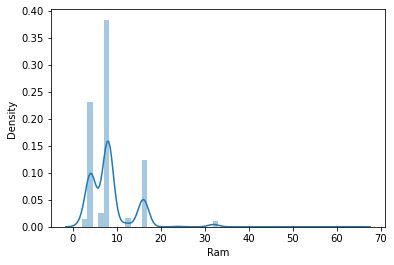

In [262]:
sns.distplot(df['Ram'])

##### 'Ram' looks kind of skewed. Lets apply log

<AxesSubplot:xlabel='Ram', ylabel='Density'>

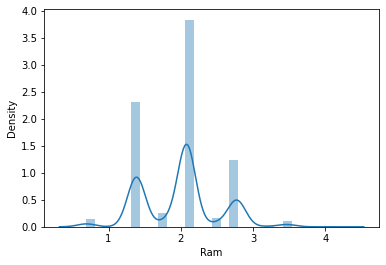

In [263]:
sns.distplot(np.log(df['Ram']))

##### Now, the normal curves are centered

<AxesSubplot:xlabel='Weight', ylabel='Density'>

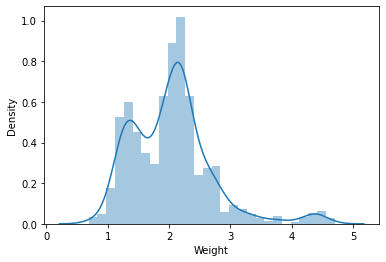

In [264]:
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

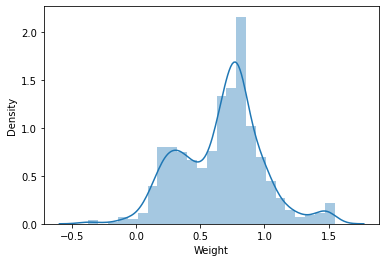

In [265]:
sns.distplot(np.log(df['Weight']))

<AxesSubplot:xlabel='Price', ylabel='Density'>

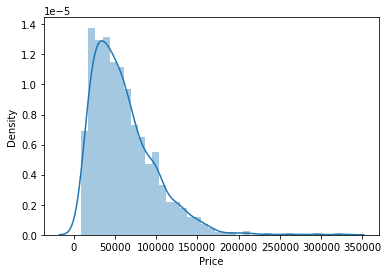

In [266]:
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

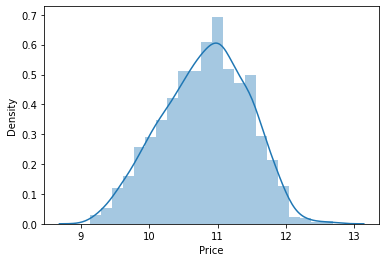

In [267]:
sns.distplot(np.log(df['Price']))

<AxesSubplot:xlabel='ppi', ylabel='Density'>

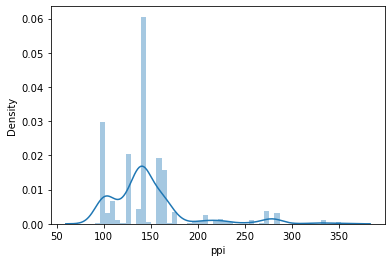

In [268]:
sns.distplot(df['ppi'])

<AxesSubplot:xlabel='ppi', ylabel='Density'>

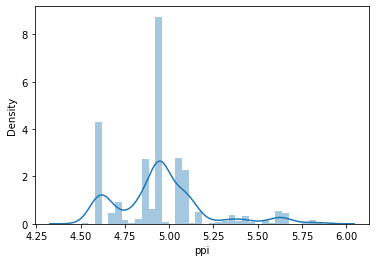

In [269]:
sns.distplot(np.log(df['ppi']))

<AxesSubplot:xlabel='HDD', ylabel='Density'>

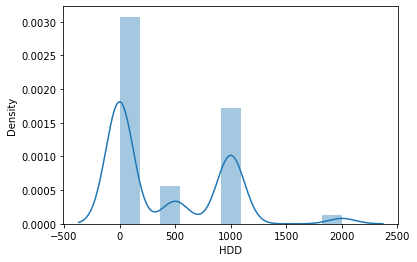

In [270]:
sns.distplot(df['HDD'])

In [271]:
def log_trf(x):
    if x==0:
        return x
    else:
        return np.log(x)

<AxesSubplot:xlabel='HDD', ylabel='Density'>

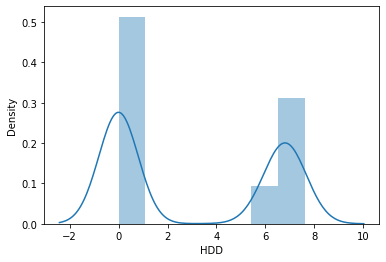

In [272]:
sns.distplot(df['HDD'].apply(log_trf))

<AxesSubplot:xlabel='SSD', ylabel='Density'>

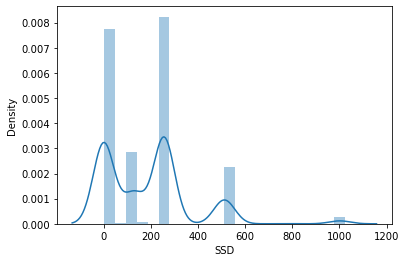

In [273]:
sns.distplot(df['SSD'])

<AxesSubplot:xlabel='SSD', ylabel='Density'>

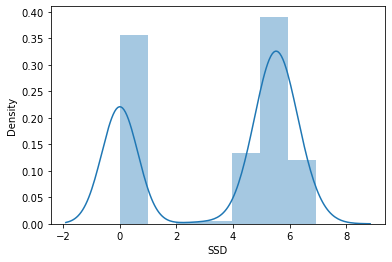

In [274]:
sns.distplot(df['SSD'].apply(log_trf))

In [275]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,os,Gpu brand,HDD,SSD
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,Mac,Intel,0,128
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,Mac,Intel,0,0
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,Others/No OS/Linux,Intel,0,256
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,Mac,AMD,0,512
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,Mac,Intel,0,256


## MultiVariate Analysis

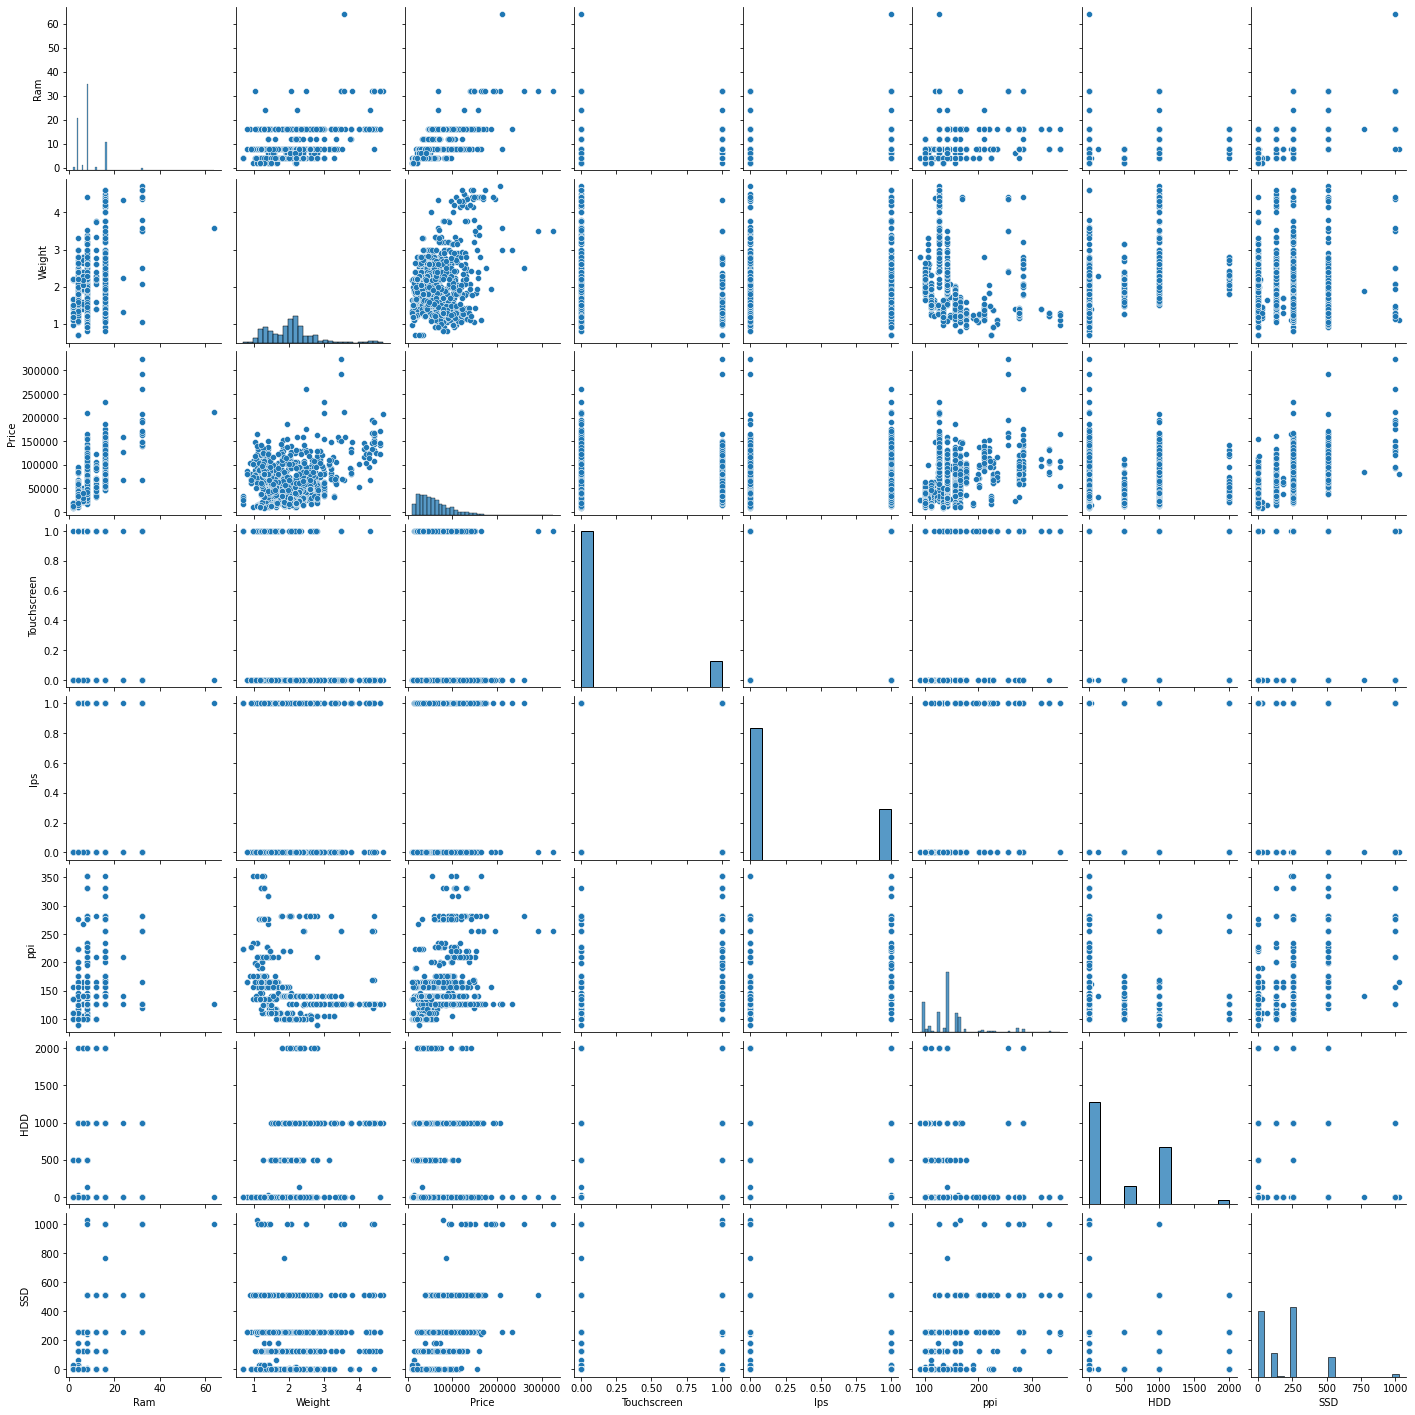

In [276]:
sns.pairplot(data)

<AxesSubplot:>

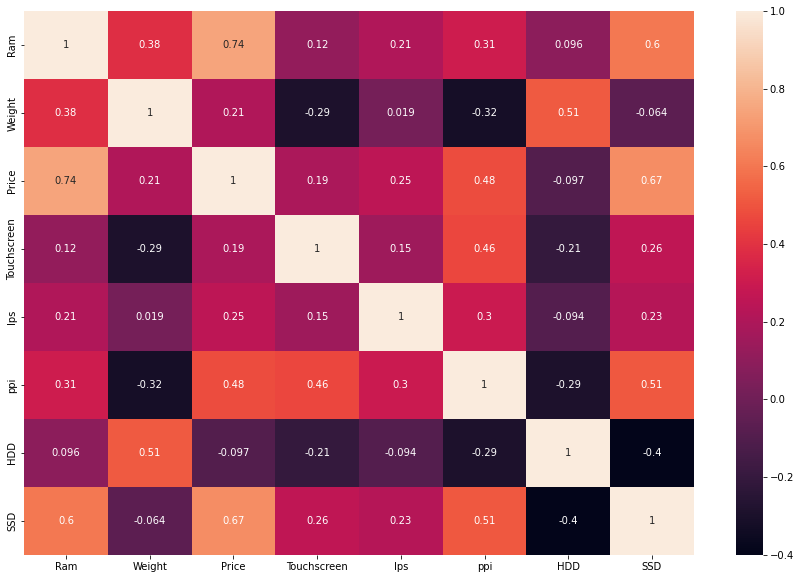

In [277]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)

##### Lets apply log transformation to specific columns to see if correlation improves or not

In [278]:
data.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,os,Gpu brand,HDD,SSD
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,Mac,Intel,0,128
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,Mac,Intel,0,0
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,Others/No OS/Linux,Intel,0,256
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,Mac,AMD,0,512
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,Mac,Intel,0,256


In [279]:
data_trf = data.copy()

In [280]:
data_trf.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'ppi', 'Cpu brand', 'os', 'Gpu brand', 'HDD', 'SSD'],
      dtype='object')

In [281]:
columns_to_log = ['Ram', 'Price', 'ppi']
data_trf[columns_to_log] = data_trf[columns_to_log].apply(lambda x: np.log(x.where(x > 0)), axis=0)

In [282]:
data_trf=data_trf.fillna(0)

In [283]:
data_trf

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,os,Gpu brand,HDD,SSD
0,Apple,Ultrabook,2.079442,1.37,11.175755,0,1,5.424875,Intel Core i5,Mac,Intel,0,128
1,Apple,Ultrabook,2.079442,1.34,10.776777,0,0,4.849511,Intel Core i5,Mac,Intel,0,0
2,HP,Notebook,2.079442,1.86,10.329931,0,0,4.950262,Intel Core i5,Others/No OS/Linux,Intel,0,256
3,Apple,Ultrabook,2.772589,1.83,11.814476,0,1,5.396055,Intel Core i7,Mac,AMD,0,512
4,Apple,Ultrabook,2.079442,1.37,11.473101,0,1,5.424875,Intel Core i5,Mac,Intel,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,1.386294,1.80,10.433899,1,1,5.058476,Intel Core i7,Windows,Intel,0,128
1299,Lenovo,2 in 1 Convertible,2.772589,1.30,11.288115,1,1,5.620595,Intel Core i7,Windows,Intel,0,512
1300,Lenovo,Notebook,0.693147,1.50,9.409283,0,0,4.717920,Other Intel Processor,Windows,Intel,0,0
1301,HP,Notebook,1.791759,2.19,10.614129,0,0,4.609707,Intel Core i7,Windows,AMD,1000,0


<AxesSubplot:>

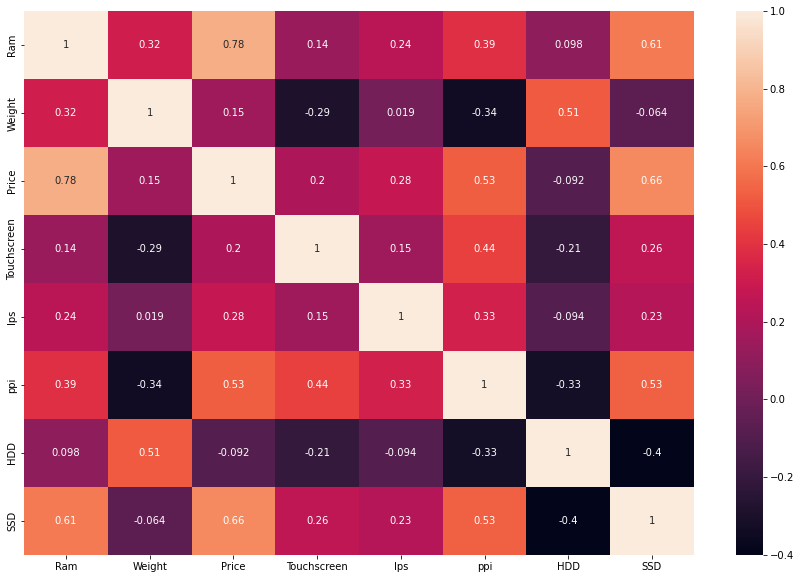

In [284]:
plt.figure(figsize=(15,10))
sns.heatmap(data_trf.corr(), annot=True)

## Training the model

In [285]:
X = data[[col for col in data_trf.columns if col!='Price']]
y = data['Price']

In [286]:
X.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,os,Gpu brand,HDD,SSD
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,Mac,Intel,0,128
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,Mac,Intel,0,0
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,Others/No OS/Linux,Intel,0,256
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,Mac,AMD,0,512
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,Mac,Intel,0,256


In [287]:
y.head()

0     71378.6832
1     47895.5232
2     30636.0000
3    135195.3360
4     96095.8080
Name: Price, dtype: float64

In [288]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [289]:
X_train.shape

(1041, 12)

In [290]:
X_test.shape

(261, 12)

In [291]:
y_train.shape

(1041,)

In [292]:
y_test.shape

(261,)

In [293]:
X_train.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,os,Gpu brand,HDD,SSD
147,Asus,Notebook,4,2.00,0,0,141.211998,Other Intel Processor,Windows,Intel,1000,0
342,HP,Notebook,8,2.10,0,1,141.211998,Intel Core i3,Windows,Nvidia,1000,0
1003,HP,Notebook,4,1.64,0,0,111.935204,Intel Core i5,Windows,Intel,500,0
814,Dell,Notebook,8,2.18,0,0,141.211998,Intel Core i5,Windows,AMD,0,256
344,Dell,Ultrabook,8,1.20,0,0,165.632118,Intel Core i7,Windows,Intel,0,256


## Linear Regression

In [294]:
# Function for Log Transformation
def log_transform(X):
    return np.log(X)  # log1p to handle zero values safely

# Log Transformer for Numerical Columns
log_transformer = FunctionTransformer(log_transform)

# Define Columns
num_cols = ['Ram', 'ppi']  # Numerical columns to log transform
cat_cols = ['Company', 'TypeName', 'Cpu brand', 'os', 'Gpu brand']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', log_transformer, num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

# XGBoost Regressor with Tuned Hyperparameters
model = LinearRegression()

# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
    ('model', model)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.66847513 0.69093023 0.75305367 0.67142973 0.71320568]
Average R2 Score: 0.6994
MAE Scores (per fold): [12507.22163955 12382.36429798 12964.93749243 12816.57848186
 13294.86258329]
Average MAE: 12793.1929
Test R2 Score: 0.7169
Test MAE: 13243.8272


## Lasso Regression

In [295]:
# Function for Log Transformation
def log_transform(X):
    return np.log(X)  # log1p to handle zero values safely

# Log Transformer for Numerical Columns
log_transformer = FunctionTransformer(log_transform)

# Define Columns
num_cols = ['Ram', 'ppi']  # Numerical columns to log transform
cat_cols = ['Company', 'TypeName', 'Cpu brand', 'os', 'Gpu brand']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', log_transformer, num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

# XGBoost Regressor with Tuned Hyperparameters
model = Lasso(alpha=0.001)

# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
    ('model', model)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.66715494 0.69251784 0.75060891 0.67275587 0.71128842]
Average R2 Score: 0.6989
MAE Scores (per fold): [12482.75143161 12403.64350142 12974.72954385 12783.7825504
 13361.61325547]
Average MAE: 12801.3041
Test R2 Score: 0.7205
Test MAE: 13251.1958


## Ridge Regression

In [296]:
# Function for Log Transformation
def log_transform(X):
    return np.log(X)  # log1p to handle zero values safely

# Log Transformer for Numerical Columns
log_transformer = FunctionTransformer(log_transform)

# Define Columns
num_cols = ['Ram', 'ppi']  # Numerical columns to log transform
cat_cols = ['Company', 'TypeName', 'Cpu brand', 'os', 'Gpu brand']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', log_transformer, num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

# XGBoost Regressor with Tuned Hyperparameters
model = Ridge()

# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
    ('model', model)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.66866278 0.69092407 0.75225035 0.67145673 0.71318937]
Average R2 Score: 0.6993
MAE Scores (per fold): [12502.07185371 12385.28540235 12977.65347578 12813.61142725
 13297.3660211 ]
Average MAE: 12795.1976
Test R2 Score: 0.7170
Test MAE: 13244.8529


## KNN

In [297]:
# Function for Log Transformation
def log_transform(X):
    return np.log(X)  # log1p to handle zero values safely

# Log Transformer for Numerical Columns
log_transformer = FunctionTransformer(log_transform)

# Define Columns
num_cols = ['Ram', 'ppi']  # Numerical columns to log transform
cat_cols = ['Company', 'TypeName', 'Cpu brand', 'os', 'Gpu brand']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', log_transformer, num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

# XGBoost Regressor with Tuned Hyperparameters
model = KNeighborsRegressor(n_neighbors=5)

# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
    ('model', model)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.70087852 0.71450617 0.62218013 0.73787761 0.69971705]
Average R2 Score: 0.6950
MAE Scores (per fold): [12308.88849911 11877.00266378 13720.57816127 12161.30827285
 13538.14403904]
Average MAE: 12721.1843
Test R2 Score: 0.6838
Test MAE: 12971.0512


## SVM

In [298]:
# Function for Log Transformation
def log_transform(X):
    return np.log(X)  # log1p to handle zero values safely

# Log Transformer for Numerical Columns
log_transformer = FunctionTransformer(log_transform)

# Define Columns
num_cols = ['Ram', 'ppi']  # Numerical columns to log transform
cat_cols = ['Company', 'TypeName', 'Cpu brand', 'os', 'Gpu brand']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', log_transformer, num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

# XGBoost Regressor with Tuned Hyperparameters
model = SVR(kernel='rbf',C=10000,epsilon=0.2)

# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
    ('model', model)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.51859761 0.4703262  0.59865852 0.59765569 0.5652251 ]
Average R2 Score: 0.5501
MAE Scores (per fold): [15022.96609221 12779.73064099 14019.12482274 14781.09847535
 16760.54431795]
Average MAE: 14672.6929
Test R2 Score: 0.6434
Test MAE: 13602.7721


## Decision Tree Regressor

In [299]:
# Function for Log Transformation
def log_transform(X):
    return np.log(X)  # log1p to handle zero values safely

# Log Transformer for Numerical Columns
log_transformer = FunctionTransformer(log_transform)

# Define Columns
num_cols = ['Ram', 'ppi']  # Numerical columns to log transform
cat_cols = ['Company', 'TypeName', 'Cpu brand', 'os', 'Gpu brand']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', log_transformer, num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

# XGBoost Regressor with Tuned Hyperparameters
model = DecisionTreeRegressor(max_depth=8)

# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
    ('model', model)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.58025058 0.65950737 0.65614113 0.65283603 0.73660029]
Average R2 Score: 0.6571
MAE Scores (per fold): [13840.27373752 12453.27748407 14846.21340577 12773.12570183
 12643.02901696]
Average MAE: 13311.1839
Test R2 Score: 0.7707
Test MAE: 11695.8486


## Random Forest Regressor

In [300]:
# Function for Log Transformation
def log_transform(X):
    return np.log(X)  # log1p to handle zero values safely

# Log Transformer for Numerical Columns
log_transformer = FunctionTransformer(log_transform)

# Define Columns
num_cols = ['Ram', 'ppi']  # Numerical columns to log transform
cat_cols = ['Company', 'TypeName', 'Cpu brand', 'os', 'Gpu brand']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', log_transformer, num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

# XGBoost Regressor with Tuned Hyperparameters
model = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
    ('model', model)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.74531562 0.73978988 0.76765352 0.79043721 0.79489178]
Average R2 Score: 0.7676
MAE Scores (per fold): [10681.81278837 10998.17890762 11203.06936021 10122.11292577
 10669.72961531]
Average MAE: 10734.9807
Test R2 Score: 0.7674
Test MAE: 10687.5040


## AdaBoost Regressor

In [301]:
# Function for Log Transformation
def log_transform(X):
    return np.log(X)  # log1p to handle zero values safely

# Log Transformer for Numerical Columns
log_transformer = FunctionTransformer(log_transform)

# Define Columns
num_cols = ['Ram', 'ppi']  # Numerical columns to log transform
cat_cols = ['Company', 'TypeName', 'Cpu brand', 'os', 'Gpu brand']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', log_transformer, num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

# XGBoost Regressor with Tuned Hyperparameters
model = AdaBoostRegressor(n_estimators=100,learning_rate=1)

# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
    ('model', model)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.67820532 0.70499527 0.63836187 0.73497913 0.69085898]
Average R2 Score: 0.6895
MAE Scores (per fold): [12970.09893547 12829.03178448 14872.1568631  13362.87529444
 14787.64944416]
Average MAE: 13764.3625
Test R2 Score: 0.7033
Test MAE: 14218.9484


## Gradient Boost

In [302]:
column_trans = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,9])
],remainder='passthrough')

scaler = StandardScaler()

model = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('column_trans',column_trans),
    ('scaler', scaler),
    ('model',model)
])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8253467045244002
MAE 10429.181428249889


In [303]:
# Function for Log Transformation
def log_transform(X):
    return np.log(X)  # log1p to handle zero values safely

# Log Transformer for Numerical Columns
log_transformer = FunctionTransformer(log_transform)

# Define Columns
num_cols = ['Ram', 'ppi']  # Numerical columns to log transform
cat_cols = ['Company', 'TypeName', 'Cpu brand', 'os', 'Gpu brand']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', log_transformer, num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

# XGBoost Regressor with Tuned Hyperparameters
model = GradientBoostingRegressor(n_estimators=500)

# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
    ('model', model)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.74801336 0.72076933 0.79678884 0.82072304 0.843999  ]
Average R2 Score: 0.7861
MAE Scores (per fold): [10147.7057036  10391.7401251  10623.66736853  9670.95772956
  9061.54252931]
Average MAE: 9979.1227
Test R2 Score: 0.8191
Test MAE: 9829.0227


## XgBoost

In [304]:
# Function for Log Transformation
def log_transform(X):
    return np.log(X)  # log1p to handle zero values safely

# Log Transformer for Numerical Columns
log_transformer = FunctionTransformer(log_transform)

# Define Columns
num_cols = ['Ram', 'ppi']  # Numerical columns to log transform
cat_cols = ['Company', 'TypeName', 'Cpu brand', 'os', 'Gpu brand']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', log_transformer, num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

# XGBoost Regressor with Tuned Hyperparameters
model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    random_state=42  # Ensures reproducibility
)

# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
    ('model', model)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.70162205 0.76136719 0.75738533 0.79138459 0.86646018]
Average R2 Score: 0.7756
MAE Scores (per fold): [10964.42773052  9624.72337692 11123.16965764  9999.7599308
  8818.71141722]
Average MAE: 10106.1584
Test R2 Score: 0.8305
Test MAE: 9687.7959


## Voting Regressor

In [305]:
# Function for Log Transformation
def log_transform(X):
    return np.log(X)  # log1p to handle zero values safely

# Log Transformer for Numerical Columns
log_transformer = FunctionTransformer(log_transform)

# Define Columns
num_cols = ['Ram', 'ppi']  # Numerical columns to log transform
cat_cols = ['Company', 'TypeName', 'Cpu brand', 'os', 'Gpu brand']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', log_transformer, num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

rf = RandomForestRegressor(n_estimators=500,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=500,max_features=0.75,random_state=3)
xgb = XGBRegressor(n_estimators=500,learning_rate=0.3,max_depth=5,random_state=3)
et = ExtraTreesRegressor(n_estimators=500,random_state=3,max_features=0.75,max_depth=10)

voting_reg = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[1,1,5,1])


# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
    ('model', voting_reg)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.71453209 0.74747931 0.74333956 0.78295015 0.84584465]
Average R2 Score: 0.7668
MAE Scores (per fold): [10397.56438307  9915.36060505 11377.13566476  9792.84177444
  9173.30710655]
Average MAE: 10131.2419
Test R2 Score: 0.8479
Test MAE: 9332.2501


## Stacking Regressor

In [306]:
# Function for Log Transformation
def log_transform(X):
    return np.log(X)  # log1p to handle zero values safely

# Log Transformer for Numerical Columns
log_transformer = FunctionTransformer(log_transform)

# Define Columns
num_cols = ['Ram', 'ppi']  # Numerical columns to log transform
cat_cols = ['Company', 'TypeName', 'Cpu brand', 'os', 'Gpu brand']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', log_transformer, num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=5))
]

stacking_reg = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))


# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
    ('model', stacking_reg)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.74540137 0.74863221 0.74732363 0.79342036 0.76832131]
Average R2 Score: 0.7606
MAE Scores (per fold): [10544.30067936 10777.31159839 11713.44880105 10180.91489843
 11528.11360978]
Average MAE: 10948.8179
Test R2 Score: 0.7980
Test MAE: 10847.6975


# <center> Finding the Best Model <center>

In [307]:
X = data.drop(columns='Price')
y = data['Price']

In [308]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [309]:
X_train.isna().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Touchscreen    0
Ips            0
ppi            0
Cpu brand      0
os             0
Gpu brand      0
HDD            0
SSD            0
dtype: int64

In [310]:
y.isna().sum()

0

In [311]:
np.log1p(0)

0.0

In [312]:
# Function for Log Transformation
def log_transform(X):
    return np.log1p(X)  # log1p to handle zero values safely

# Log Transformer for Numerical Columns
log_transformer = FunctionTransformer(log_transform)

# Define Columns
num_cols = ['Ram', 'ppi']  # Numerical columns to log transform
cat_cols = ['Company', 'TypeName', 'Cpu brand', 'os', 'Gpu brand']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', log_transformer, num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

# # XGBoost Regressor with Tuned Hyperparameters
# xgb = XGBRegressor(
#     n_estimators=200,
#     learning_rate=0.1,
#     max_depth=5,
#     subsample=0.8,
#     random_state=42  # Ensures reproducibility
# )

# # Pipeline for Preprocessing and Model
# pipe = Pipeline([
#     ('column_trans', column_trans),  # Apply ColumnTransformer
#     ('scaler', scaler),              # Scale numerical features
#     ('model', xgb)                   # Train XGBoost Regressor
# ])

# # TransformedTargetRegressor to Log Transform Target Variable (y)
# regressor = TransformedTargetRegressor(
#     regressor=pipe,                  # Use the pipeline as the base model
#     func=np.log,                   # Log transform for y
#     inverse_func=np.expm1            # Inverse transform for predictions
# )


In [313]:
def find_best_model_using_gridsearchcv(X, y):
    # Ensure no zeros or negative values in y for log transformation
    if np.any(y <= 0):
        raise ValueError("Target variable (y) contains zero or negative values. Cannot apply log transformation.")

    # Define algorithms with corrected parameter keys
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'regressor__model__normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'regressor__model__alpha': [0.001, 0.01, 0.1, 1, 2],
                'regressor__model__selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'regressor__model__alpha': [0.01, 0.1, 1, 10],
                'regressor__model__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
            }
        },
        'knn': {
            'model': KNeighborsRegressor(),
            'params': {
                'regressor__model__n_neighbors': [3, 5, 10, 15],
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'regressor__model__max_depth': [None, 5, 10, 15, 20],
                'regressor__model__criterion': ['squared_error', 'friedman_mse'],
                'regressor__model__splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'regressor__model__n_estimators': [10, 50, 100],
                'regressor__model__max_features': ['auto', 'sqrt', 'log2'],
                'regressor__model__max_depth': [None, 10, 20],
                'regressor__model__min_samples_split': [2, 5, 10]
            }
        },
        'adaboost': {
            'model': AdaBoostRegressor(),
            'params': {
                'regressor__model__n_estimators': [10, 50, 100],
                'regressor__model__learning_rate': [0.01, 0.1, 0.2, 1]  
            }
        },
        'gradient_boost': {
            'model': GradientBoostingRegressor(),
            'params': {
                'regressor__model__n_estimators': [10, 50, 100],
                'regressor__model__learning_rate': [0.01, 0.1, 0.2, 1]  
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'regressor__model__n_estimators': [50, 100, 200],
                'regressor__model__learning_rate': [0.01, 0.1, 0.2, 1],
                'regressor__model__max_depth': [3, 5, 10, 15],
                'regressor__model__subsample': [0.7, 0.8, 1.0]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        # Create a pipeline
        pipe = Pipeline([
            ('column_trans', column_trans),  # Add your column transformer here
            ('scaler', scaler),              # Add scaler here
            ('pca', PCA(n_components=10)),                  # Add PCA for dimensionality reduction
            ('model', config['model'])       # Placeholder for model
        ])
        
        # Wrap pipeline in TransformedTargetRegressor
        regressor = TransformedTargetRegressor(
            regressor=pipe,                  # Use the pipeline as the base model
            func=np.log1p,                   # Log1p transform for y
            inverse_func=np.expm1            # Inverse transform for predictions
        )

        # Use GridSearchCV with TransformedTargetRegressor
        gs = GridSearchCV(regressor, config['params'], cv=cv, scoring='r2', return_train_score=False)
        gs.fit(X, y)
        
        # Append model performance
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    # Return as a DataFrame
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [314]:
def find_best_model_using_gridsearchcv(X, y):
    # Ensure no zeros or negative values in y for log transformation
    if np.any(y <= 0):
        raise ValueError("Target variable (y) contains zero or negative values. Cannot apply log transformation.")

    # Define algorithms with corrected parameter keys
    algos = {
        
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'regressor__model__n_estimators': [10, 50, 100, 200],
                'regressor__model__max_features': ['auto', 'sqrt', 'log2'],
                'regressor__model__max_depth': [None, 10, 20],
                'regressor__model__min_samples_split': [2, 5, 10]
            }
        },
        'adaboost': {
            'model': AdaBoostRegressor(),
            'params': {
                'regressor__model__n_estimators': [10, 50, 100, 200],
                'regressor__model__learning_rate': [0.01, 0.1, 0.2, 1]  
            }
        },
        'gradient_boost': {
            'model': GradientBoostingRegressor(),
            'params': {
                'regressor__model__n_estimators': [10, 50, 100, 200],
                'regressor__model__learning_rate': [0.01, 0.1, 0.2, 1]  
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'regressor__model__n_estimators': [50, 100, 200],
                'regressor__model__learning_rate': [0.01, 0.1, 0.2, 1],
                'regressor__model__max_depth': [3, 5, 10, 15],
                'regressor__model__subsample': [0.7, 0.8, 1.0]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        # Create a pipeline
        pipe = Pipeline([
            ('column_trans', column_trans),  # Add your column transformer here
            ('scaler', scaler),              # Add scaler here
#             ('pca', PCA(n_components=10)),                  # Add PCA for dimensionality reduction
            ('model', config['model'])       # Placeholder for model
        ])
        
        # Wrap pipeline in TransformedTargetRegressor
        regressor = TransformedTargetRegressor(
            regressor=pipe,                  # Use the pipeline as the base model
            func=np.log1p,                   # Log1p transform for y
            inverse_func=np.expm1            # Inverse transform for predictions
        )

        # Use GridSearchCV with TransformedTargetRegressor and multiple scoring metrics
        gs = GridSearchCV(
            regressor, 
            config['params'], 
            cv=cv, 
            scoring=['r2', 'neg_mean_absolute_error'], 
            refit='r2',  # Refit using R² as the primary metric
            return_train_score=False
        )
        gs.fit(X, y)
        
        # Append model performance
        scores.append({
            'model': algo_name,
            'best_r2_score': gs.best_score_,
            'best_mae': -gs.cv_results_['mean_test_neg_mean_absolute_error'][gs.best_index_],  # Convert to positive MAE
            'best_params': gs.best_params_
        })
    
    # Return as a DataFrame
    return pd.DataFrame(scores, columns=['model', 'best_r2_score', 'best_mae', 'best_params'])


In [315]:
model_df = find_best_model_using_gridsearchcv(X_train,y_train)

In [316]:
model_df

,model,best_r2_score,best_mae,best_params
0,random_forest,0.772706,10698.052064,"{'regressor__model__max_depth': 10, 'regressor..."
1,adaboost,0.687652,13675.285043,"{'regressor__model__learning_rate': 1, 'regres..."
2,gradient_boost,0.787828,10337.685105,"{'regressor__model__learning_rate': 0.2, 'regr..."
3,xgboost,0.794395,10205.474038,"{'regressor__model__learning_rate': 0.2, 'regr..."


In [317]:
model_df['best_r2_score'].max()

0.7943954011735676

In [318]:
print(model_df.iloc[model_df['best_r2_score'].idxmax(),:])

model                                                      xgboost
best_r2_score                                             0.794395
best_mae                                              10205.474038
best_params      {'regressor__model__learning_rate': 0.2, 'regr...
Name: 3, dtype: object


In [319]:
print(model_df[model_df['model']=='xgboost']['best_params'].values)

[{'regressor__model__learning_rate': 0.2, 'regressor__model__max_depth': 3, 'regressor__model__n_estimators': 200, 'regressor__model__subsample': 1.0}]


##### Xgboost works best and will be choosing this model with best parameters as final one

## Let's build the Xgboost model from scratch on our data

In [324]:
# Function for Log Transformation
def log_transform(X):
    return np.log(X)  # log1p to handle zero values safely

# Log Transformer for Numerical Columns
log_transformer = FunctionTransformer(log_transform)

# Define Columns
num_cols = ['Ram', 'ppi']  # Numerical columns to log transform
cat_cols = ['Company', 'TypeName', 'Cpu brand', 'os', 'Gpu brand']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', FunctionTransformer(np.log1p, validate=True), num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

# XGBoost Regressor with Tuned Hyperparameters
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.5,
    random_state=3  # Ensures reproducibility
)

# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
#     ('pca', PCA(n_components=10)), 
    ('model', xgb)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.66996822 0.70244455 0.7092236  0.74932278 0.85302736]
Average R2 Score: 0.7368
MAE Scores (per fold): [11101.84719042 10659.69085352 12204.37814979 10505.8806024
  9411.36717906]
Average MAE: 10776.6328
Test R2 Score: 0.8391
Test MAE: 9451.5892


## Exporting the model

In [325]:
import pickle
pickle.dump(data, open('data.pkl','wb'))
pickle.dump(regressor, open('regressor.pkl','wb'))

In [326]:
data.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,os,Gpu brand,HDD,SSD
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,Mac,Intel,0,128
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,Mac,Intel,0,0
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,Others/No OS/Linux,Intel,0,256
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,Mac,AMD,0,512
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,Mac,Intel,0,256
